In [2]:
# Importing general use libraries (matplotlib and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

import io
dataframe1 = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
dataframe2 = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))

# Click in Choose Files and select data file

Saving train_labels.csv to train_labels.csv
Saving train_values.csv to train_values.csv


In [4]:
df1 = dataframe1
df2 = dataframe2

In [5]:
df1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df1.has_secondary_use_agriculture.value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

In [7]:
df1.shape


(260601, 39)

In [8]:
df2.shape

(260601, 2)

In [9]:
df = df1
df['damage_grade'] = df2['damage_grade']
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [11]:
d = {1:"low", 2:"medium", 3:"high"}
df.damage_grade = df.damage_grade.apply(lambda x: d[x])

In [12]:
df.damage_grade.value_counts()

medium    148259
high       87218
low        25124
Name: damage_grade, dtype: int64

# **Analisis por geo level**

In [13]:
len(df.geo_level_1_id.unique())

31

### Vamos a trabajar con los que tengan mas de 1000 muestreos en este caso

In [14]:
df.geo_level_1_id.value_counts()


6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [15]:
# I get the zones with more than 1000 samples
geo_1 = df[['building_id','geo_level_1_id', 'damage_grade']]
geo_1 = geo_1.groupby('geo_level_1_id').filter(lambda x: len(x) > 1000)
len(geo_1.geo_level_1_id.unique())

27

In [16]:

geo_1_count = geo_1.groupby(['geo_level_1_id', 'damage_grade']).count()
geo_1_count = geo_1_count.reset_index().rename(columns={'building_id':'count'})
geo_1_count

,geo_level_1_id,damage_grade,count
0,0,high,599
1,0,low,337
2,0,medium,3075
3,1,high,305
4,1,low,411
...,...,...,...
76,27,low,465
77,27,medium,6007
78,30,high,307
79,30,low,252


## Podría analizarse a partir de este gráfico características de la región 17 por tener tantos casos de high damage grade.

Text(0.5, 1.0, 'Edificios dañados para cada grado de daño según geo level 1')

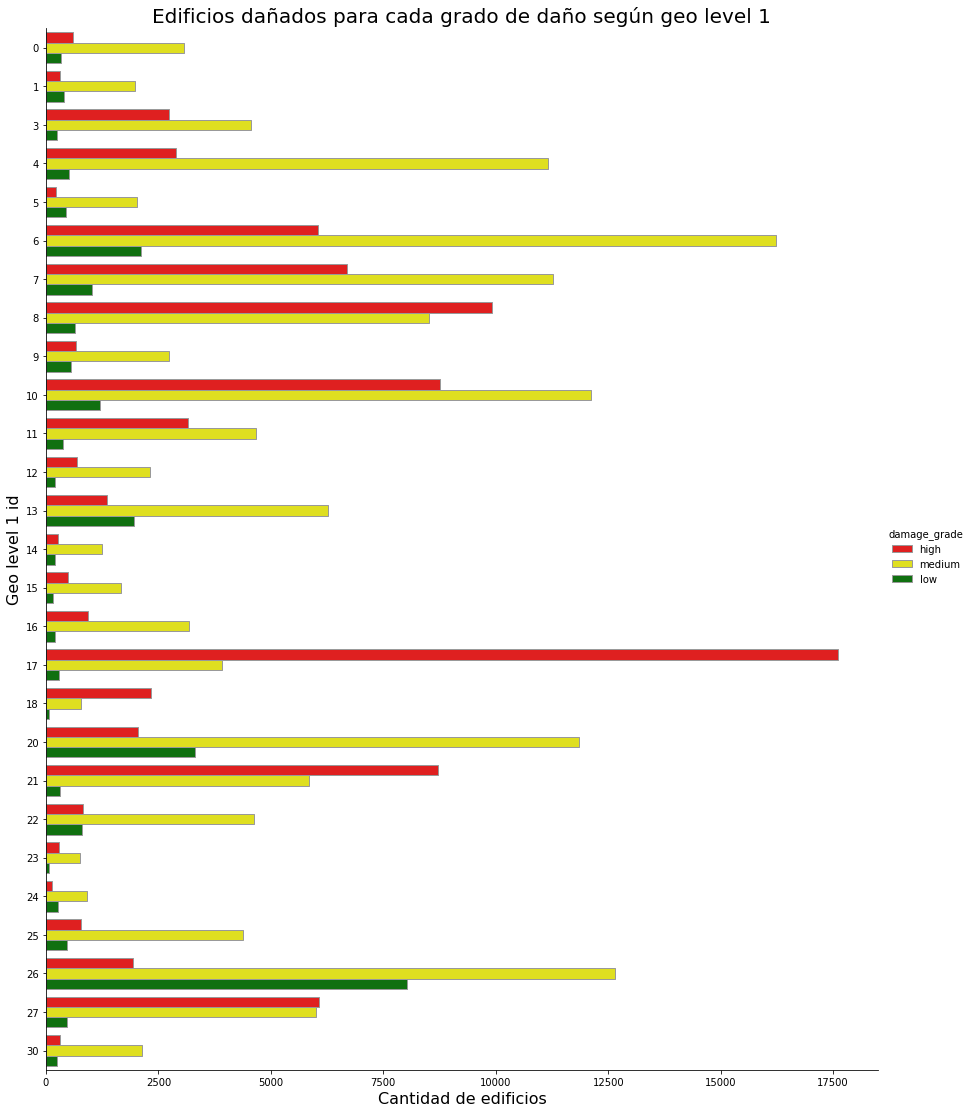

In [17]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.color_palette("pastel")
palette_ ={"high": "red", "medium": "yellow", "low": "green"}
sns.catplot(y="geo_level_1_id", hue="damage_grade", kind="count",
             edgecolor=".6",
            data=geo_1, height=15, aspect=6.7/8.27, palette=palette_)
plt.ylabel("Geo level 1 id", size=16)
plt.xlabel("Cantidad de edificios", size=16)
plt.title("Edificios dañados para cada grado de daño según geo level 1", size=20)

### Repetimos el proceso de filtrado para trabajar con geo level 2 y 3, pero los graficos resultantes no entregaron algo de información que resulte notoria.

In [18]:
len(df.geo_level_2_id.unique())


1414

In [19]:
df.geo_level_2_id.value_counts().head(20)


39      4038
158     2520
181     2080
1387    2040
157     1897
363     1760
463     1740
673     1704
533     1684
883     1626
1394    1537
548     1497
1006    1450
720     1359
991     1145
1001    1135
889     1114
765     1091
1253    1090
1155    1069
Name: geo_level_2_id, dtype: int64

In [20]:
geo_2 = df[['building_id','geo_level_2_id', 'damage_grade']]
geo_2 = geo_2.groupby('geo_level_2_id').filter(lambda x: len(x) > 1000)
len(geo_2.geo_level_2_id.unique())

26

Text(0.5, 1.0, 'Edificios dañados para cada grado de daño según geo level 2')

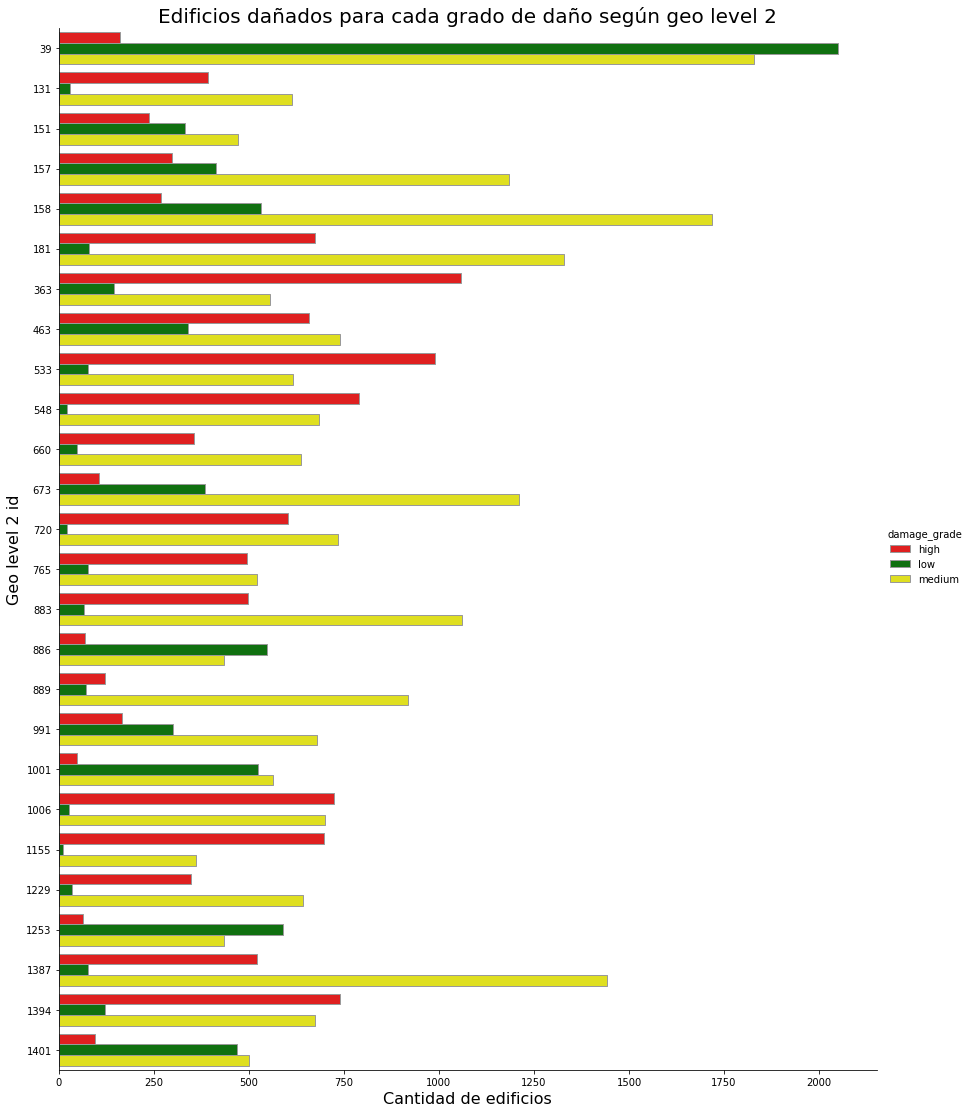

In [21]:
sns.catplot(y="geo_level_2_id", hue="damage_grade", kind="count",
            edgecolor=".6",
            data=geo_2, height=15, aspect=6.7/8.27, palette=palette_)
plt.xlabel("Cantidad de edificios", size=16)
plt.ylabel("Geo level 2 id", size=16)
plt.title("Edificios dañados para cada grado de daño según geo level 2", size=20)

In [22]:
len(df.geo_level_3_id.unique())


11595

In [23]:
df.geo_level_3_id.value_counts().head(30)


633      651
9133     647
621      530
11246    470
2005     466
11440    455
7723     443
9229     381
2452     349
12258    312
8236     303
10445    302
2170     283
6626     283
2537     259
85       252
406      251
6973     248
7868     247
3904     241
10221    237
10795    236
1851     236
11319    230
10728    228
11015    225
9897     223
5839     218
9272     212
1320     212
Name: geo_level_3_id, dtype: int64

In [24]:
geo_3 = df[['building_id','geo_level_3_id', 'damage_grade']]
geo_3 = geo_3.groupby('geo_level_3_id').filter(lambda x: len(x) > 200)
len(geo_3.geo_level_3_id.unique())

36

Text(0.5, 1.0, 'Edificios dañados para cada grado de daño según geo level 3')

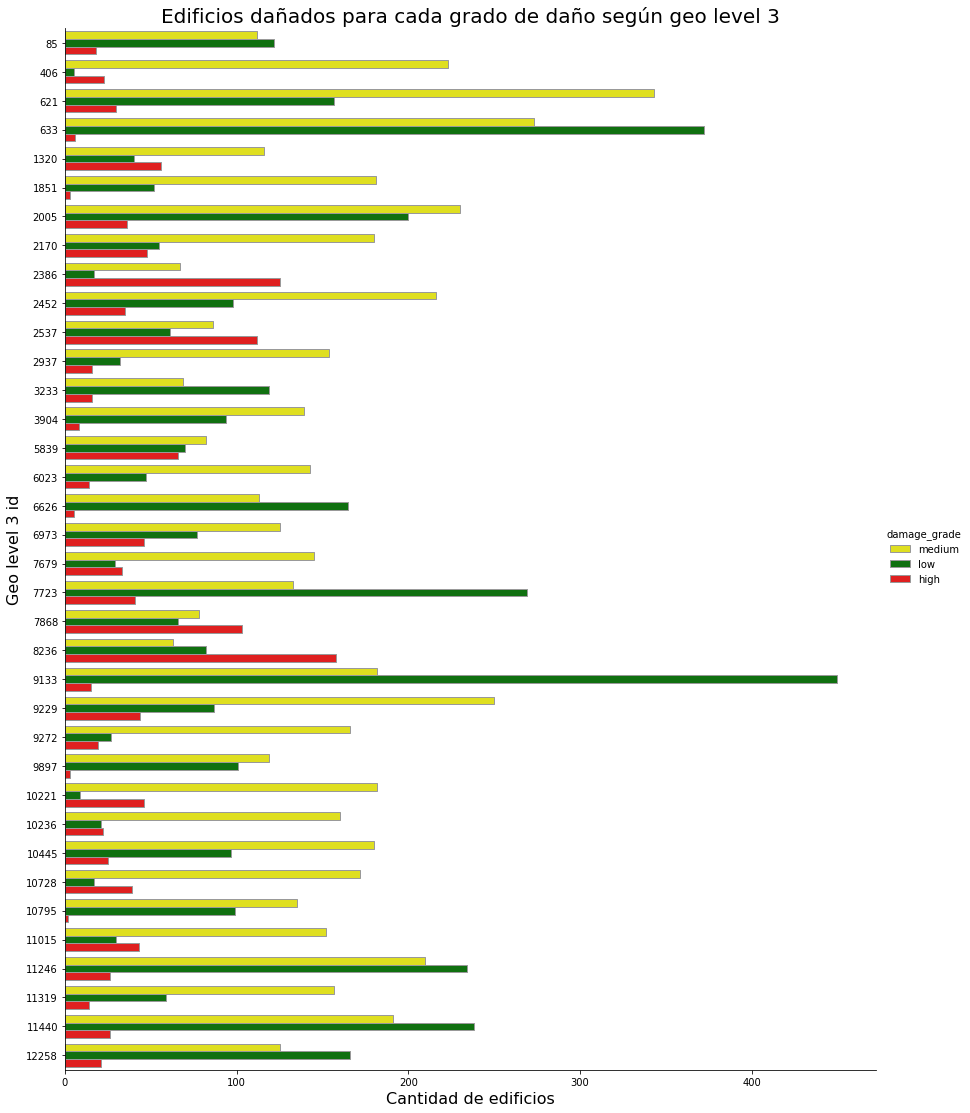

In [25]:

sns.catplot(y="geo_level_3_id", hue="damage_grade", kind="count",
            palette=palette_, edgecolor=".6",
            data=geo_3, height=15, aspect=6.7/8.27)
plt.xlabel("Cantidad de edificios", size=16)
plt.ylabel("Geo level 3 id", size=16)
plt.title("Edificios dañados para cada grado de daño según geo level 3", size=20)

In [26]:
geo_3_low = df[(df['geo_level_3_id']== 9133 )|( df['geo_level_3_id']== 7723) | (df['geo_level_3_id']== 633)]
geo_3_low.damage_grade.value_counts()
geo_3_low.has_superstructure_rc_engineered.value_counts()

0    1223
1     518
Name: has_superstructure_rc_engineered, dtype: int64

In [40]:
plan_conf_df = df.groupby(['plan_configuration', 'damage_grade']).agg({'building_id': 'count'})
plan_conf_df

building_id
plan_configuration damage_grade             
a                  high                   29
                   low                    66
                   medium                157
c                  high                   33
                   low                    86
                   medium                206
d                  high                84239
                   low                 23310
                   medium             142523
f                  high                    6
                   medium                 16
m                  high                    4
                   low                     8
                   medium                 34
n                  high                   12
                   low                     6
                   medium                 20
o                  high                   23
                   low                    40
                   medium                 96
q                  high                 2326
                   low                   781
                   medium               2585
s                  high                   70
                   low                    53
                   medium                223
u                  high                  476
                   low                   774
                   medium               2399

In [41]:
plan_conf_prc = plan_conf_df.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
plan_conf_prc

building_id
plan_configuration damage_grade             
a                  high            11.507937
                   low             26.190476
                   medium          62.301587
c                  high            10.153846
                   low             26.461538
                   medium          63.384615
d                  high            33.685898
                   low              9.321315
                   medium          56.992786
f                  high            27.272727
                   medium          72.727273
m                  high             8.695652
                   low             17.391304
                   medium          73.913043
n                  high            31.578947
                   low             15.789474
                   medium          52.631579
o                  high            14.465409
                   low             25.157233
                   medium          60.377358
q                  high            40.864371
                   low             13.721012
                   medium          45.414617
s                  high            20.231214
                   low             15.317919
                   medium          64.450867
u                  high            13.044670
                   low             21.211291
                   medium          65.744039

In [225]:
# Repetir para (df['plan_configuration']== 'd') 
q_conf_df = df[(df['plan_configuration']== 'q')]
q_conf_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
40,306024,10,825,7934,2,20,8,5,t,r,n,f,x,s,q,0,0,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
221,703296,10,661,9789,2,15,4,4,t,r,n,f,q,s,q,0,1,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
233,866259,26,39,11246,1,0,6,2,t,w,q,v,j,s,q,0,0,0,0,0,1,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0,low
235,586356,17,367,4731,2,60,9,5,t,r,q,x,q,j,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,high
292,838560,7,157,5181,2,15,4,5,n,r,n,x,q,s,q,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260361,827208,22,942,11428,1,10,4,2,t,r,n,f,j,j,q,0,0,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
260393,28173,25,502,2778,1,10,3,3,o,r,n,f,j,t,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,high
260490,543155,17,876,12119,1,5,19,3,n,i,x,v,j,s,q,0,0,0,0,0,0,0,0,1,0,0,r,1,0,0,0,0,0,0,0,0,0,0,0,medium
260538,866745,20,508,8707,2,20,11,6,t,w,q,f,x,s,q,0,0,0,0,0,0,0,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,low


In [226]:
q_conf_df.groupby(['age','damage_grade']).agg({'building_id': 'count'})

building_id
age damage_grade             
0   high                  190
    low                   294
    medium                290
5   high                  277
    low                   183
...                       ...
200 high                    3
    medium                  2
995 high                   19
    low                     3
    medium                 14

[69 rows x 1 columns]

Text(0.5, 1.0, 'Daño por edad de edificios con configuracion q')

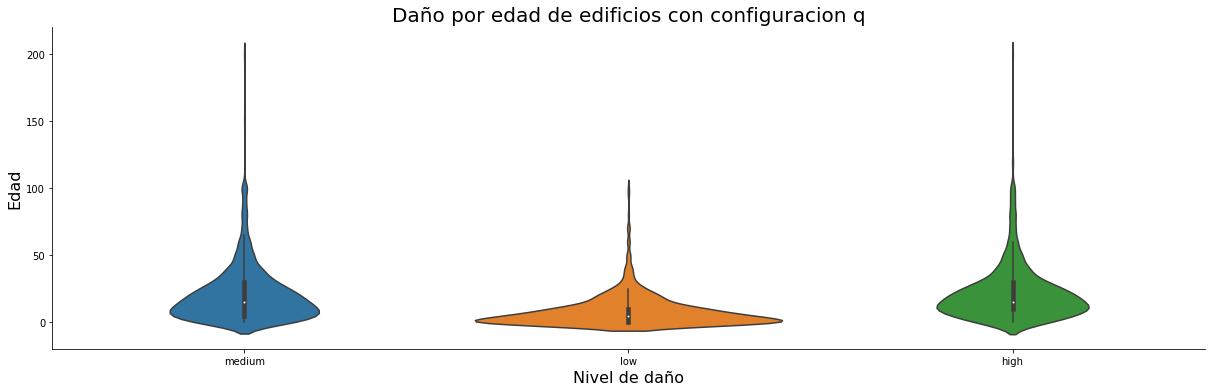

In [231]:
aux_df = q_conf_df[q_conf_df['age'] != 995]
sns.catplot(x="damage_grade", y="age", 
            kind="violin", data=aux_df,
            height=5, aspect=20.0/6.0)
            # height=8, aspect=9.0/6.0)
plt.xlabel("Nivel de daño", size=16)
plt.ylabel("Edad", size=16)
plt.title("Daño por edad de edificios con configuracion q", size=20)

Text(0.5, 1.0, 'Cantidad de edificios dañados segun edad de edificios')

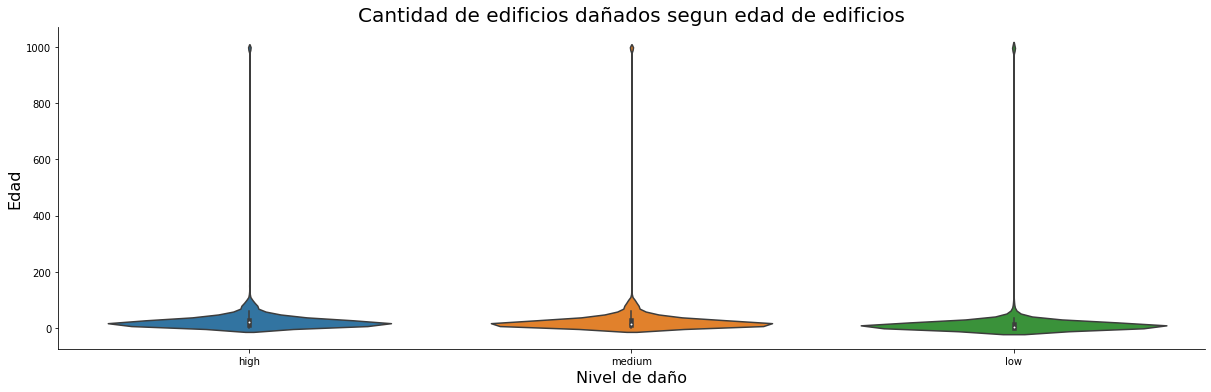

In [224]:
sns.catplot(x="damage_grade", y="age", 
            kind="violin", data=df,
            height=5, aspect=20.0/6.0)
plt.xlabel("Nivel de daño", size=16)
plt.ylabel("Edad", size=16)
plt.title("Cantidad de edificios dañados segun edad de edificios", size=20)

Text(0.5, 1.0, 'Cantidad de edificios dañados segun edad de edificios sin la edad 995')

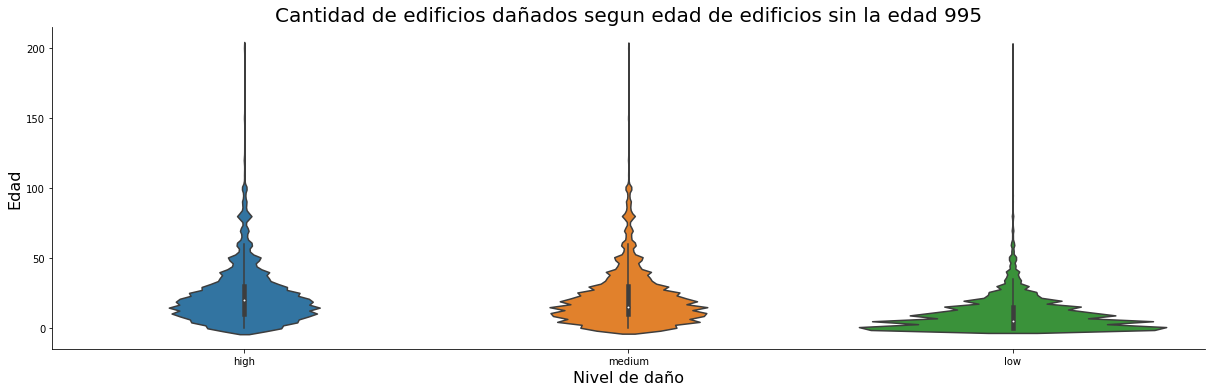

In [223]:
df_sin_995_anios = df[df['age'] != 995]
sns.catplot(x="damage_grade", y="age", 
            kind="violin", data=df_sin_995_anios,
            height=5, aspect=20.0/6.0)
plt.xlabel("Nivel de daño", size=16)
plt.ylabel("Edad", size=16)
plt.title("Cantidad de edificios dañados segun edad de edificios sin la edad 995", size=20)

In [88]:
df_low = df[df['damage_grade'] == 'low']
df_low.age.value_counts().head(15)

0      7213
5      5590
10     4360
15     2878
20     1954
25     1131
30      640
35      352
40      283
995     179
50      170
45      120
60       76
55       45
70       32
Name: age, dtype: int64

In [89]:
df_high = df[df['damage_grade'] == 'high']
df_high.age.value_counts().head(15)

15    12365
10    12166
20    11625
25     9162
5      9077
30     6944
0      6107
40     4188
35     4112
50     2931
45     1789
60     1421
80     1268
55      773
70      753
Name: age, dtype: int64

In [90]:
df_medium = df[df['damage_grade'] == 'medium']
df_medium.age.value_counts().head(15)

10    22370
15    20767
5     19030
20    18603
25    14073
0     12721
30    10444
35     6246
40     6088
50     4156
45     2802
60     2115
80     1759
55     1215
70     1190
Name: age, dtype: int64

In [96]:
age_df = df.groupby(['age', 'damage_grade']).agg({'building_id': 'count'})
building_age_prc = age_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
building_age_prc.tail(10)

building_id
age damage_grade             
185 medium         100.000000
190 high            33.333333
    medium          66.666667
195 medium         100.000000
200 high            36.792453
    low              2.830189
    medium          60.377358
995 high            27.985612
    low             12.877698
    medium          59.136691

In [104]:
df_low.groupby(['age']).agg({'building_id': 'count'}).apply(lambda x: 100 * x / float(x.sum())).head(10)

# building_age_prc = age_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# building_age_prc.tail(10)
# df_low

,building_id
age,
0,28.709600
5,22.249642
10,17.353925
15,11.455182
20,7.777424
25,4.501672
30,2.547365
35,1.401051
40,1.126413


In [108]:
df_high.groupby(['age']).agg({'building_id': 'count'}).apply(lambda x: 100 * x / float(x.sum())).nlargest(10,'building_id')


,building_id
age,
15,14.177119
10,13.948955
20,13.328671
25,10.504712
5,10.407255
30,7.961659
0,7.001995
40,4.801761
35,4.714623


In [110]:
df_medium.groupby(['age']).agg({'building_id': 'count'}).apply(lambda x: 100 * x / float(x.sum())).nlargest(10,'building_id')


,building_id
age,
10,15.088460
15,14.007244
5,12.835646
20,12.547636
25,9.492172
0,8.580255
30,7.044429
35,4.212898
40,4.106327


In [120]:
new_buildings = df.loc[lambda df: df["age"] <= 15]
# new_buildings.groupby('geo_level_1_id')
new_buildings

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,high
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,medium
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260593,226421,8,767,8613,2,5,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,medium
260594,159555,27,181,1537,6,0,13,12,t,r,n,f,x,j,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,high
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,medium


Text(0.5, 1.0, 'Edificios con menos de 15 años dañados para cada grado de daño según geo level 1')

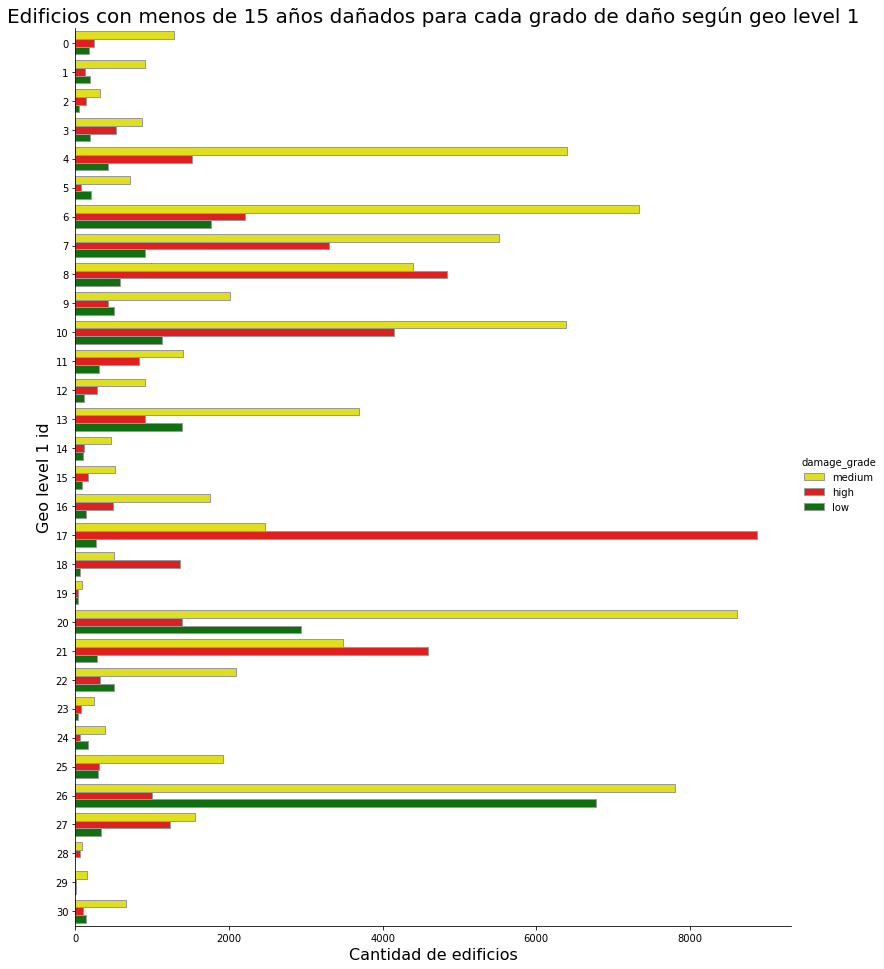

In [121]:

sns.catplot(y="geo_level_1_id", hue="damage_grade", kind="count",
            edgecolor=".6",
            data=new_buildings, height=13, aspect=6.7/8.27, palette=palette_)
plt.xlabel("Cantidad de edificios", size=16)
plt.ylabel("Geo level 1 id", size=16)
plt.title("Edificios con menos de 15 años dañados para cada grado de daño según geo level 1", size=20)

In [118]:
df.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [ ]:
new_buildings.age.value_counts()

In [ ]:
ax = sns.heatmap(flights, annot=True, fmt="d")

In [167]:
df_radar = new_buildings[['damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
df_radar_pct = df_radar.groupby('damage_grade').mean()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
high,0.048722,0.910261,0.052751,0.009593,0.020874,0.013547,0.224651,0.064636,0.016744,0.001360,0.010298
low,0.017315,0.281523,0.006537,0.034928,0.019410,0.311761,0.302879,0.117110,0.170151,0.122748,0.028043
medium,0.051477,0.741574,0.030806,0.026907,0.037296,0.108322,0.287616,0.109283,0.052238,0.016518,0.014729


In [168]:
df_radar_pct.T

damage_grade,high,low,medium
has_superstructure_adobe_mud,0.048722,0.017315,0.051477
has_superstructure_mud_mortar_stone,0.910261,0.281523,0.741574
has_superstructure_stone_flag,0.052751,0.006537,0.030806
has_superstructure_cement_mortar_stone,0.009593,0.034928,0.026907
has_superstructure_mud_mortar_brick,0.020874,0.019410,0.037296
has_superstructure_cement_mortar_brick,0.013547,0.311761,0.108322
has_superstructure_timber,0.224651,0.302879,0.287616
has_superstructure_bamboo,0.064636,0.117110,0.109283
has_superstructure_rc_non_engineered,0.016744,0.170151,0.052238
has_superstructure_rc_engineered,0.001360,0.122748,0.016518


In [169]:
df_radar_pct = df_radar_pct.reset_index()

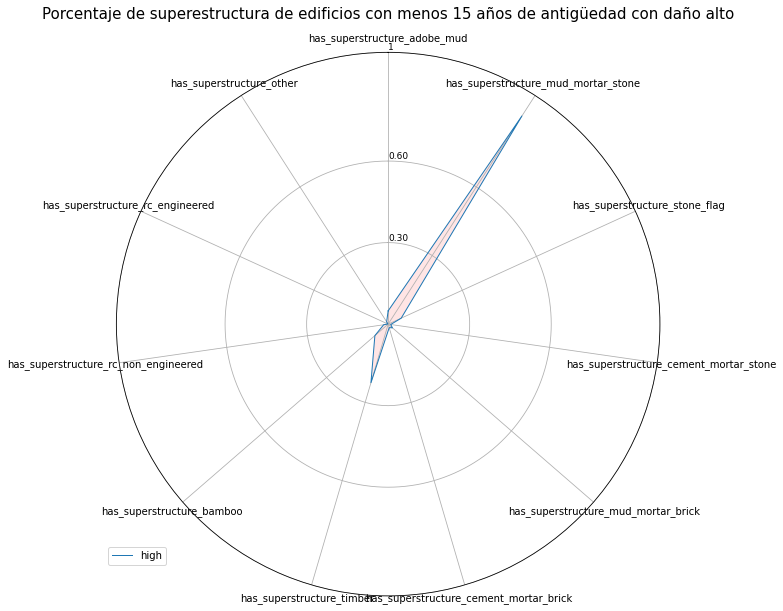

In [260]:
from math import pi

# ------- PART 1: Create background

# number of variable
categories=list(df_radar_pct)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=df_radar_pct.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="high")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años de antigüedad con daño alto", size=15)

# Show the graph
plt.show()

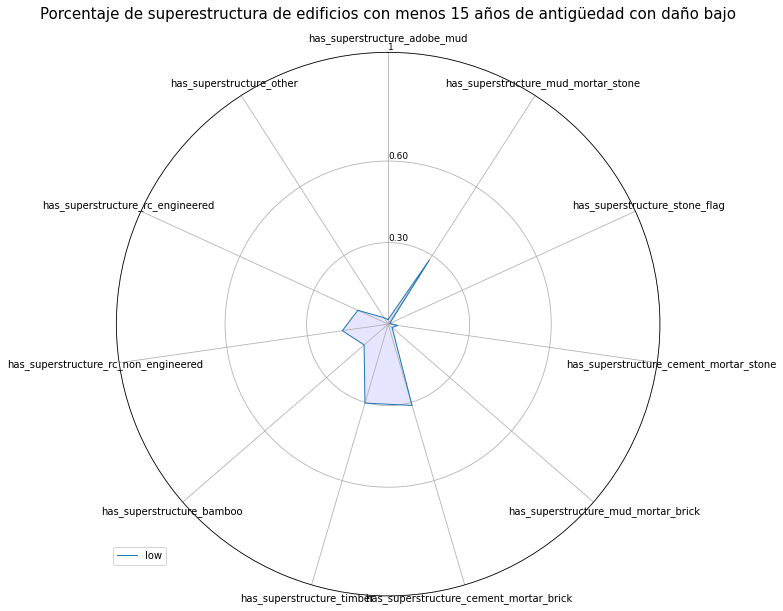

In [257]:
categories=list(df_radar_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)
 
values=df_radar_pct.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="low")
ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años de antigüedad con daño bajo", size=15)
plt.show()

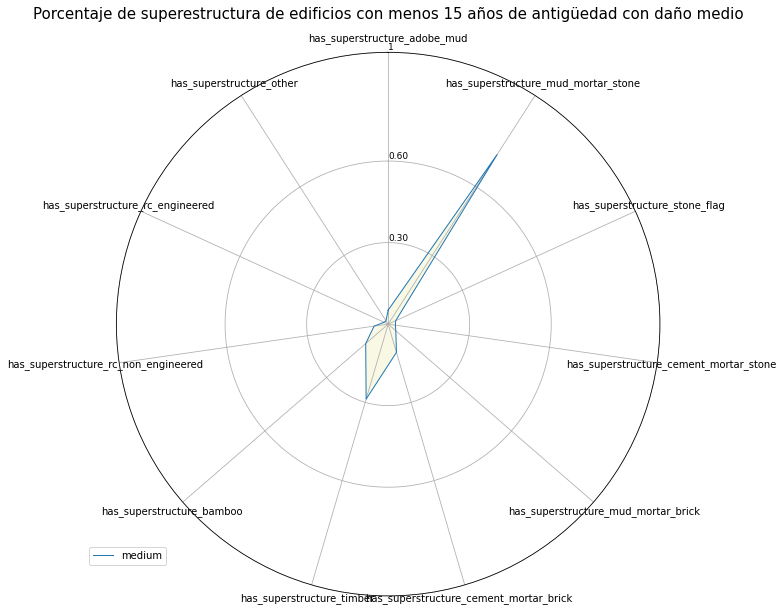

In [258]:
categories=list(df_radar_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)
 
values=df_radar_pct.loc[2].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="medium")
ax.fill(angles, values, 'y', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años de antigüedad con daño medio", size=15)
plt.show()

# Analisis de los geo level 1: 8, 17, 21 y 26

In [183]:
geo_level_1_n8 = df[(df['geo_level_1_id'] == 8)]
geo_level_1_n8.damage_grade.value_counts()

high      9913
medium    8513
low        654
Name: damage_grade, dtype: int64

In [188]:
radar_geo_n8 = geo_level_1_n8[['damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
radar_geo_n8_pct = radar_geo_n8.groupby('damage_grade').mean()
radar_geo_n8_pct = radar_geo_n8_pct.reset_index()
radar_geo_n8_pct

,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,high,0.040956,0.966610,0.025522,0.005952,0.011399,0.004943,0.165238,0.053364,0.013417,0.000101,0.017956
1,low,0.016820,0.133028,0.009174,0.029052,0.018349,0.244648,0.048930,0.021407,0.418960,0.215596,0.044343
2,medium,0.041583,0.895219,0.027252,0.021262,0.018912,0.040996,0.179843,0.055445,0.034535,0.013274,0.024081


In [180]:
geo_level_1_n17 = df[(df['geo_level_1_id'] == 17)]
geo_level_1_n17.damage_grade.value_counts()

high      17615
medium     3913
low         285
Name: damage_grade, dtype: int64

In [189]:
radar_geo_n17 = geo_level_1_n17[['damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
radar_geo_n17_pct = radar_geo_n17.groupby('damage_grade').mean()
radar_geo_n17_pct = radar_geo_n17_pct.reset_index()
radar_geo_n17_pct

,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,high,0.030485,0.970423,0.063866,0.008345,0.011638,0.008799,0.176327,0.050525,0.003860,0.000624,0.000795
1,low,0.000000,0.129825,0.014035,0.091228,0.014035,0.484211,0.084211,0.024561,0.378947,0.150877,0.038596
2,medium,0.020700,0.798876,0.064912,0.042934,0.005622,0.118579,0.139279,0.038078,0.096857,0.026323,0.004856


In [181]:
geo_level_1_n21 = df[(df['geo_level_1_id'] == 21)]
geo_level_1_n21.damage_grade.value_counts()

high      8710
medium    5857
low        322
Name: damage_grade, dtype: int64

In [190]:
radar_geo_n21 = geo_level_1_n21[['damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
radar_geo_n21_pct = radar_geo_n21.groupby('damage_grade').mean()
radar_geo_n21_pct = radar_geo_n21_pct.reset_index()
radar_geo_n21_pct

,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,high,0.019403,0.989782,0.011596,0.004248,0.000344,0.002296,0.164638,0.022618,0.020551,0.000344,0.006889
1,low,0.003106,0.316770,0.015528,0.018634,0.003106,0.375776,0.170807,0.043478,0.145963,0.118012,0.062112
2,medium,0.015366,0.952365,0.015878,0.012634,0.001707,0.018952,0.136759,0.021683,0.025610,0.005122,0.012122


In [182]:
geo_level_1_n26 = df[(df['geo_level_1_id'] == 26)]
geo_level_1_n26.damage_grade.value_counts()

medium    12645
low        8028
high       1942
Name: damage_grade, dtype: int64

In [191]:
radar_geo_n26 = geo_level_1_n26[['damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']]
radar_geo_n26_pct = radar_geo_n26.groupby('damage_grade').mean()
radar_geo_n26_pct = radar_geo_n26_pct.reset_index()
radar_geo_n26_pct

,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,high,0.034501,0.785788,0.012873,0.008239,0.037590,0.047374,0.425850,0.034501,0.011329,0.000000,0.018023
1,low,0.006477,0.198181,0.002367,0.017813,0.016692,0.409317,0.431739,0.041106,0.086821,0.071873,0.019183
2,medium,0.044998,0.576275,0.017873,0.031949,0.036378,0.230842,0.417715,0.051483,0.054883,0.016924,0.020482


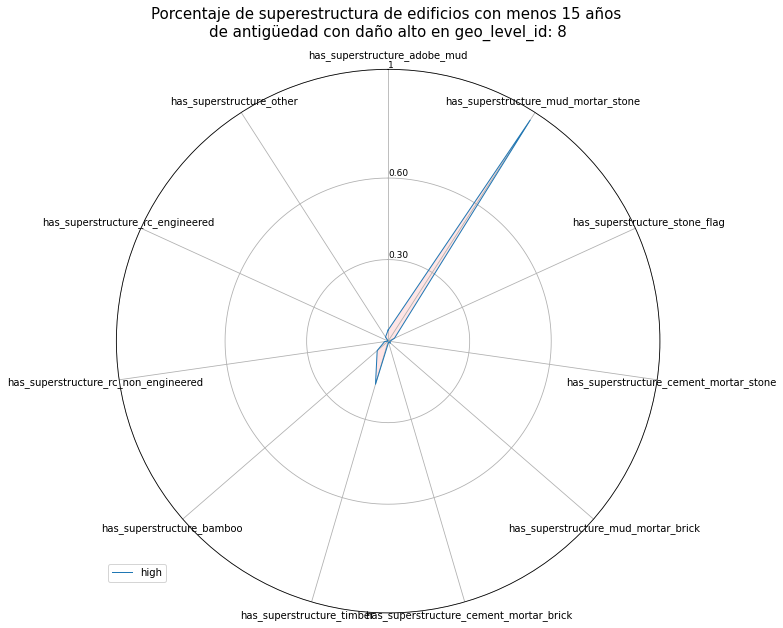

In [256]:
categories=list(radar_geo_n8_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)
 
values=radar_geo_n8_pct.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="high")
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño alto en geo_level_id: 8", size=15)
plt.show()

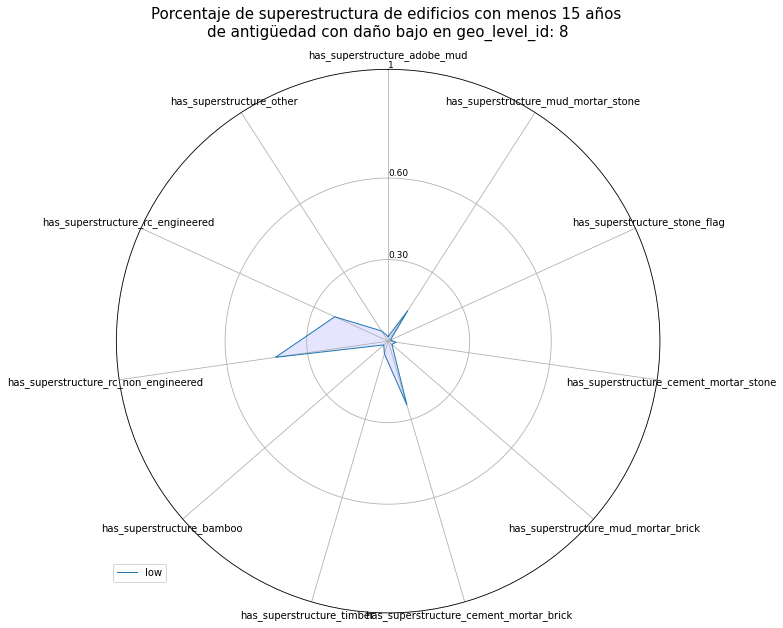

In [255]:
categories=list(radar_geo_n8_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)

values=radar_geo_n8_pct.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="low")
ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño bajo en geo_level_id: 8", size=15)
plt.show()

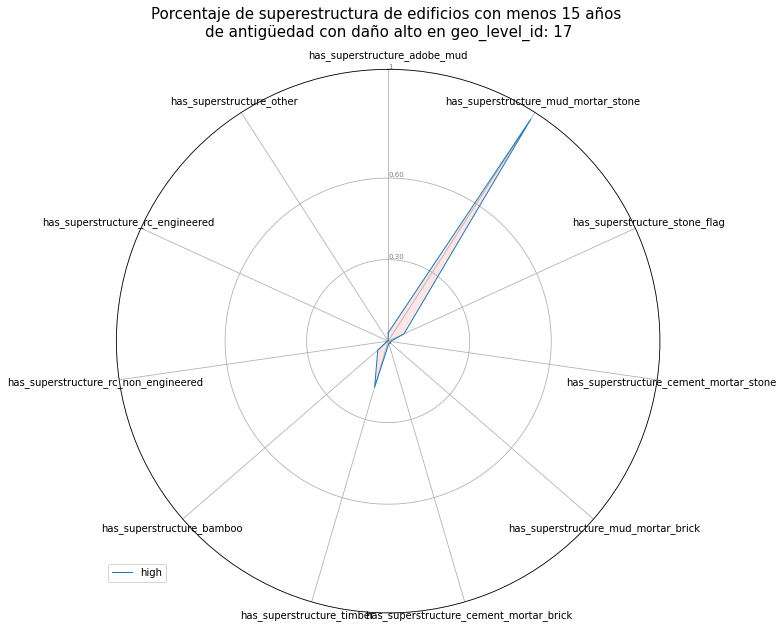

In [240]:
categories=list(radar_geo_n17_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)
 
values=radar_geo_n17_pct.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="high")
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño alto en geo_level_id: 17", size=15)
plt.show()

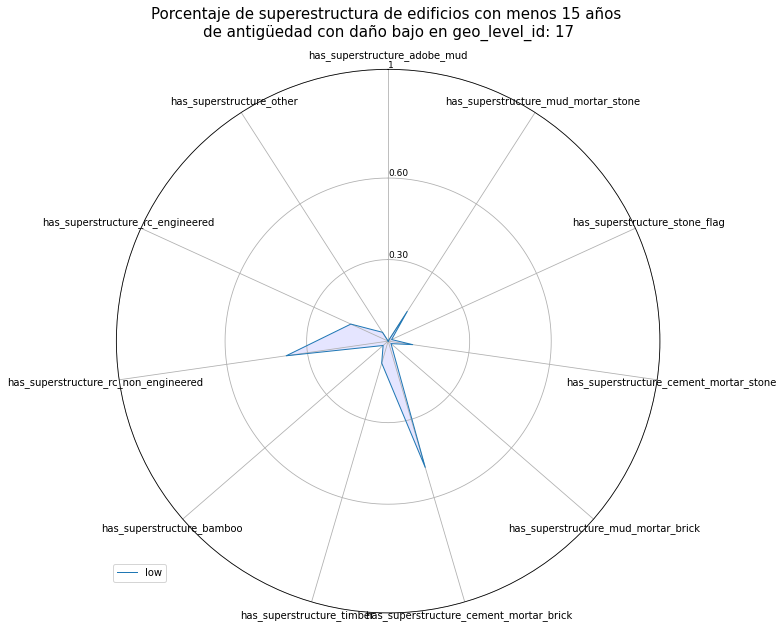

In [254]:
categories=list(radar_geo_n17_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)

values=radar_geo_n17_pct.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="low")
ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño bajo en geo_level_id: 17", size=15)
plt.show()

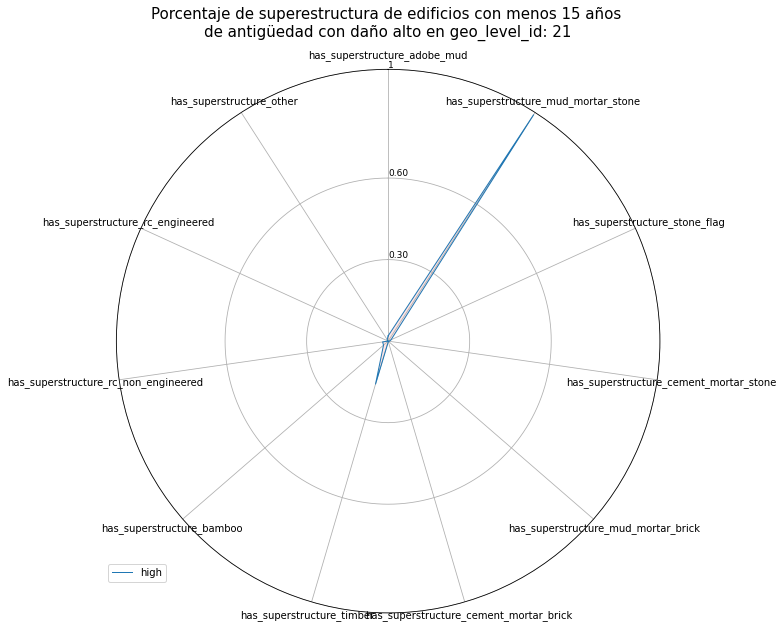

In [253]:
categories=list(radar_geo_n21_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)

values=radar_geo_n21_pct.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="high")
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño alto en geo_level_id: 21", size=15)
plt.show()

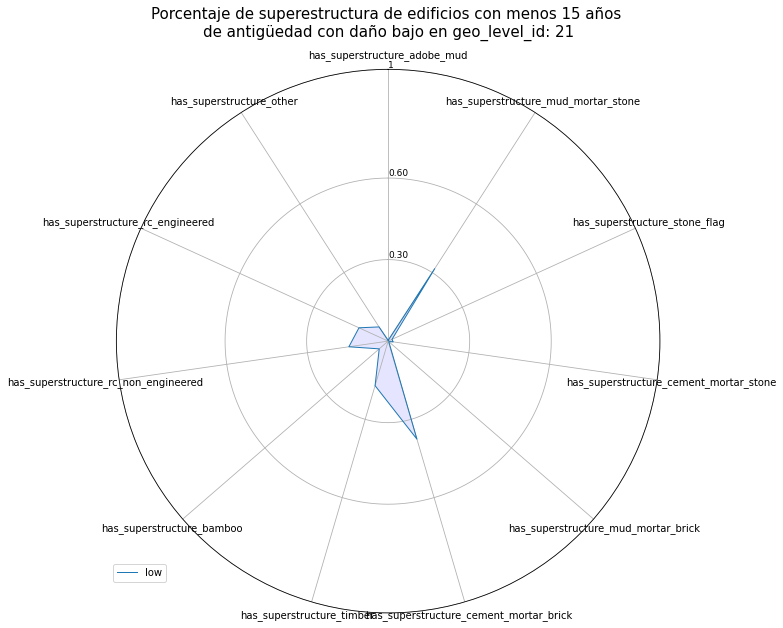

In [252]:
categories=list(radar_geo_n21_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)

values=radar_geo_n21_pct.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="low")
ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño bajo en geo_level_id: 21", size=15)
plt.show()

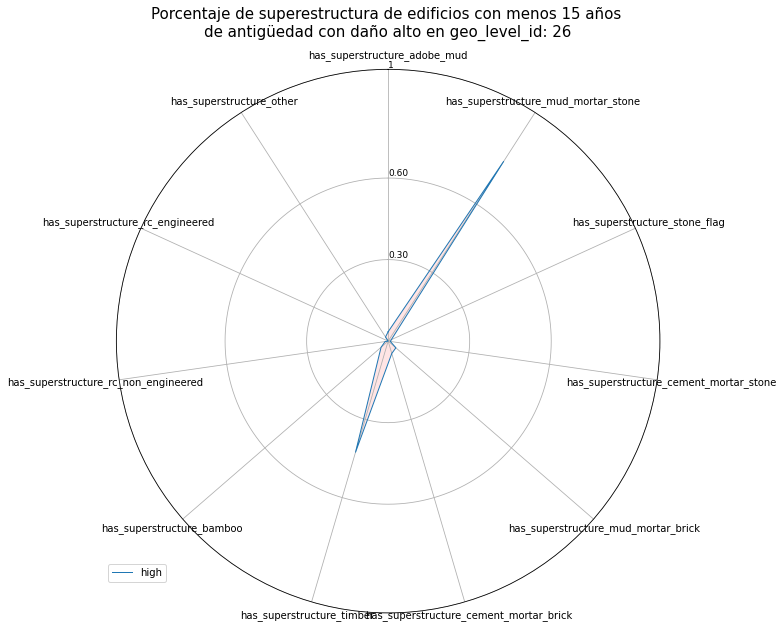

In [251]:
categories=list(radar_geo_n26_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)
 
values=radar_geo_n26_pct.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="high")
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño alto en geo_level_id: 26", size=15)
plt.show()

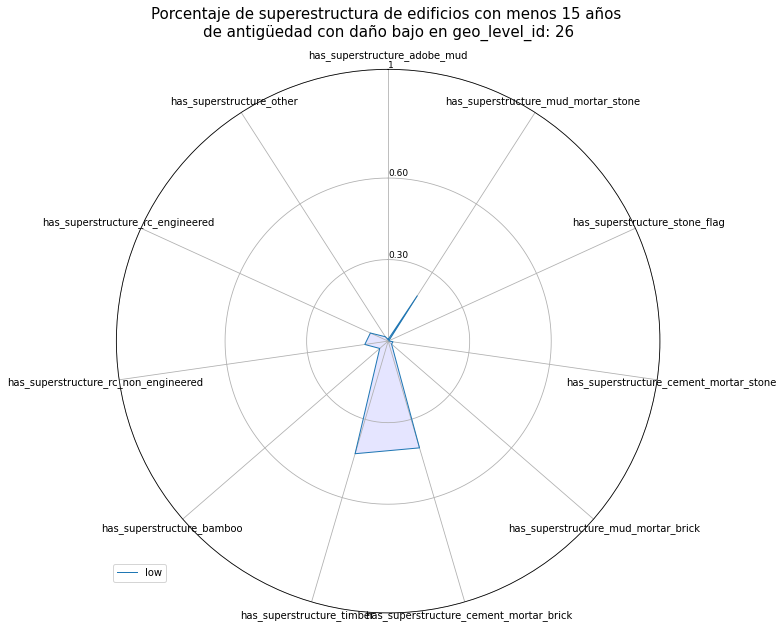

In [250]:
categories=list(radar_geo_n26_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.30,0.60,1], ["0.30","0.60","1"], color="black", size=9)
plt.ylim(0,1)

values=radar_geo_n26_pct.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="low")
ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje de superestructura de edificios con menos 15 años \nde antigüedad con daño bajo en geo_level_id: 26", size=15)
plt.show()

In [208]:
secondary_uses_df = df[['damage_grade', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']]
secondary_uses_df_pct = secondary_uses_df.groupby('damage_grade').mean()
secondary_uses_df_pct = secondary_uses_df_pct.reset_index()
secondary_uses_df_pct


,damage_grade,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,high,0.082472,0.060412,0.017072,0.002098,0.000195,0.000195,0.000780,0.000057,0.000046,0.000080,0.003520
1,low,0.169081,0.032996,0.088203,0.034907,0.003940,0.001194,0.002348,0.000478,0.000517,0.000159,0.006965
2,medium,0.119487,0.072029,0.034116,0.007089,0.000870,0.000317,0.001025,0.000216,0.000142,0.000081,0.005747


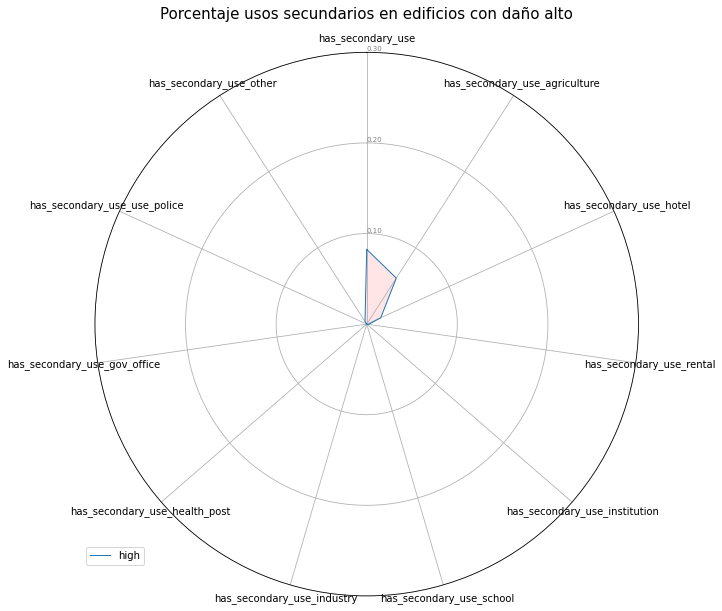

In [246]:
categories=list(secondary_uses_df_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.10,0.20,0.30], ["0.10","0.20","0.30"], color="black", size=10)
plt.ylim(0,0.3)

values=secondary_uses_df_pct.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="high")
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje usos secundarios en edificios con daño alto", size=15)
plt.show()

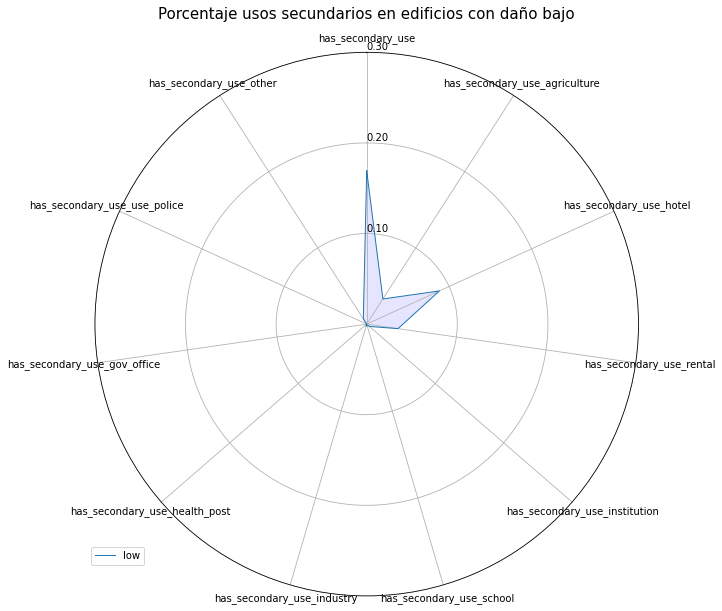

In [249]:
categories=list(secondary_uses_df_pct)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([0.10,0.20,0.30], ["0.10","0.20","0.30"], color="black", size=10)
plt.ylim(0,0.3)

values=secondary_uses_df_pct.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="low")
ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Porcentaje usos secundarios en edificios con daño bajo", size=15)
plt.show()